In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ast
from scipy.stats import kurtosis


## Loading

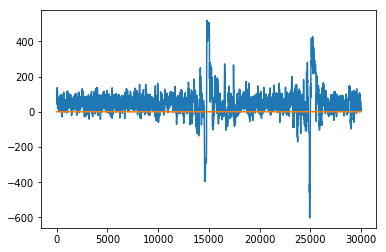

In [4]:
"""
purpose: parse raw data/label file, return data as numpy array
"""

def parse_file(dataFileName):
    f=open(dataFileName)
    strL=f.read()
    l=ast.literal_eval(strL)
    return np.array(l)

def plotData(data):
    plt.plot([x[0] for x in data])
    plt.plot([x[2] for x in data])#poor_signal
    return

#Test
dataFileName='signal_data\signal03_11_2019__10_43_51.txt'
postData=parse_file(dataFileName)
plotData(postData)
    

  

## Filtering
### eyeblinks, band pass filter

In [ ]:
"""
purpose: find the indecii of trails that possibly contaminated by eyeblinks
"""
def eyeblink_identifier(brainwave_vec, num_of_trials, window_interval, rejection_std):
    kurtosis_vec = np.array([])
    while (idx < brainwave_vec.size-window_interval):
        np.append(kurtosis, kurtosis(brainwave_vec[idx:idx+window_interval]))
        idx += window_interval
    bad_kurtosis_index = kurtosis_vec < 
    


## Processing
### Chop the data into trials, discard bad trials, average trails with the same stimuli

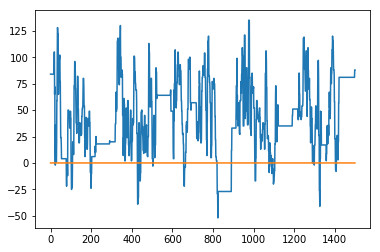

In [10]:
f="signal_data\signal03_11_2019__10_57_39.txt" #signal data
g="stimuli_data\stimuli03_11_2019__10_57_39.txt" #stimuli stamp

#signalFile format: (outputlevel, timestamp, quality)
#stimuliFile format: (,,timestamp)
#output format:
def sync(signalFile,stimuliFile,scopePre,scopePost):   
    f=parse_file(signalFile)
    g=parse_file(stimuliFile)
    temp=[]
    out=[]
    for i in g:
        temp=[]
        for j in f:
            if j[1]>i[2]+scopePre and j[1]<i[2]+scopePost:
                temp.append(j)
        out.append(temp)
    return out

ff=sync(f,g,-0.2,1.3)
plotData(ff[0])



## Classification